# Explore here

In [154]:
#cargamos instancias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [155]:

# Leer el CSV descargado localmente
df = pd.read_csv("/Users/luiseduardogarciablanco/Desktop/bootcamp/EDA Project ABNB/EDA_project_ABNB/data/raw/AB_NYC_2019.csv")

df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [32]:
# Resumen estadístico
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [156]:
# Información general del DataFrame tipos de datos y valores no nulos (non-null)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [34]:
# Obtener las dimensiones
df.shape

(48895, 16)

In [157]:
# Ver las columnas del DataFrame (nombre de las columnas)
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

En general, para un dataset típico de Airbnb como el que parece que tienes, puedes esperar columnas como:

	•	id: Identificador único del anuncio.
	•	name: Nombre del anuncio.
	•	host_id: Identificador del anfitrión.
	•	host_name: Nombre del anfitrión.
	•	neighbourhood_group: Grupo de vecindario (ej. Manhattan, Brooklyn, etc.).
	•	neighbourhood: Vecindario específico.
	•	latitude: Latitud de la ubicación.
	•	longitude: Longitud de la ubicación.
	•	room_type: Tipo de habitación (ej. Entire home/apt, Private room, Shared room).
	•	price: Precio por noche.
	•	minimum_nights: Número mínimo de noches de estadía.
	•	number_of_reviews: Número de reseñas.
	•	last_review: Fecha de la última reseña.
	•	reviews_per_month: Número de reseñas por mes.
	•	calculated_host_listings_count: Número de anuncios del anfitrión.
	•	availability_365: Disponibilidad en días durante el año.

In [158]:
# verificamos el tipo de habitacion (para saber que datos hay)
# Contar las ocurrencias de cada valor en la columna seleccionada
value_counts = df['room_type'].value_counts()
value_counts

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64

In [159]:
# control de duplicados
df.duplicated().sum()

0

In [160]:
df['host_name'].duplicated().sum()

37442

separamos y creamos un nuevo dataframe con los datos relevantes (columnas) para graficar

	•	id: Identificador único del anuncio.
	•	neighbourhood_group: Grupo de vecindario (ej. Manhattan, Brooklyn, etc.).
	•	neighbourhood: Vecindario específico.
	•	latitude: Latitud de la ubicación.
	•	longitude: Longitud de la ubicación.
	•	room_type: Tipo de habitación (ej. Entire home/apt, Private room, Shared room).
	•	price: Precio por noche.
	•	minimum_nights: Número mínimo de noches de estadía.
	•	number_of_reviews: Número de reseñas.
	•	last_review: Fecha de la última reseña.
	•	reviews_per_month: Número de reseñas por mes.
	•	availability_365: Disponibilidad en días durante el año.
	
	

In [161]:
#creamos dataframe con datos relevantes para los modelos predictivos
columns = ['neighbourhood_group', 'neighbourhood', 'room_type', 'price','minimum_nights', 'number_of_reviews', 'availability_365']

df_rel = df[columns]

df_rel

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,availability_365
0,Brooklyn,Kensington,Private room,149,1,9,365
1,Manhattan,Midtown,Entire home/apt,225,1,45,355
2,Manhattan,Harlem,Private room,150,3,0,365
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,194
4,Manhattan,East Harlem,Entire home/apt,80,10,9,0
...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,Private room,70,2,0,9
48891,Brooklyn,Bushwick,Private room,40,4,0,36
48892,Manhattan,Harlem,Entire home/apt,115,10,0,27
48893,Manhattan,Hell's Kitchen,Shared room,55,1,0,2


Analisis de variables categóricas :


    •	neighbourhood_group: Grupo de vecindario (ej. Manhattan, Brooklyn, etc.).
	•	neighbourhood: Vecindario específico.
	•	room_type: Tipo de habitación (ej. Entire home/apt, Private room, Shared room).
	•	price: Precio por noche.
	•	minimum_nights: Número mínimo de noches de estadía.



In [162]:
#añadiremos una columna nueva con el resultado de la columna room_type categorizando el resultado llamada "room_type_code"

# Crear un diccionario de mapeo

room_type_map = {
    'Entire home/apt': 3,
    'Private room': 2,
    'Shared room': 1}

# Aplicar el mapeo y añadimos la columna 'room_type_code
df_rel.loc[:, 'room_type_code'] = df_rel['room_type'].map(room_type_map) #Utiliza .loc para asignar los valores a una nueva columna 'room_type_code' de manera explícita.

df_rel


/var/folders/sc/w6cv9_291mqc4c1m0qn06_4m0000gn/T/ipykernel_40409/2839032484.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rel.loc[:, 'room_type_code'] = df_rel['room_type'].map(room_type_map) #Utiliza .loc para asignar los valores a una nueva columna 'room_type_code' de manera explícita.


,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,availability_365,room_type_code
0,Brooklyn,Kensington,Private room,149,1,9,365,2
1,Manhattan,Midtown,Entire home/apt,225,1,45,355,3
2,Manhattan,Harlem,Private room,150,3,0,365,2
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,194,3
4,Manhattan,East Harlem,Entire home/apt,80,10,9,0,3
...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,Private room,70,2,0,9,2
48891,Brooklyn,Bushwick,Private room,40,4,0,36,2
48892,Manhattan,Harlem,Entire home/apt,115,10,0,27,3
48893,Manhattan,Hell's Kitchen,Shared room,55,1,0,2,1


In [163]:
#identificamos los valores para ver si con categoricos o numericos
df_rel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   neighbourhood_group  48895 non-null  object
 1   neighbourhood        48895 non-null  object
 2   room_type            48895 non-null  object
 3   price                48895 non-null  int64 
 4   minimum_nights       48895 non-null  int64 
 5   number_of_reviews    48895 non-null  int64 
 6   availability_365     48895 non-null  int64 
 7   room_type_code       48895 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 3.0+ MB


In [164]:
#ualojamientos por grupo de vecindarios
df_rel.neighbourhood_group.value_counts()

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

In [165]:
#alojamientos por vecindarios especificos
df_rel.neighbourhood.value_counts()

neighbourhood
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: count, Length: 221, dtype: int64

In [166]:
# por tipo de alojamiento
df_rel.room_type.value_counts()


room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64

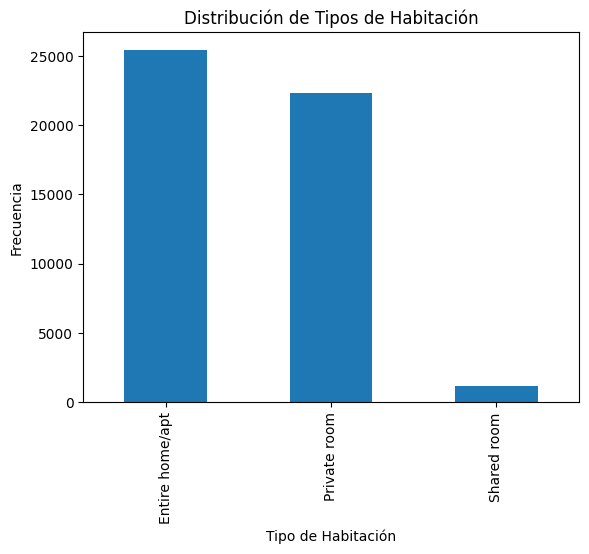

In [167]:
# Gráfico de barras de la columna 'room_type'
df_rel['room_type'].value_counts().plot(kind='bar')
plt.title('Distribución de Tipos de Habitación')
plt.xlabel('Tipo de Habitación')
plt.ylabel('Frecuencia')
plt.show()

Segun la representacion grafica las menos frecuentes son las habitaciones compartidas, por lo contrario la oferta es mas amplia en los alojamientos exclusivos (Entire Home/Apt)


In [41]:
#revisamos la variable numerica precio ('price')
# por tipo de alojamiento
df_rel.price.value_counts()

price
100    2051
150    2047
50     1534
60     1458
200    1401
       ... 
780       1
386       1
888       1
483       1
338       1
Name: count, Length: 674, dtype: int64

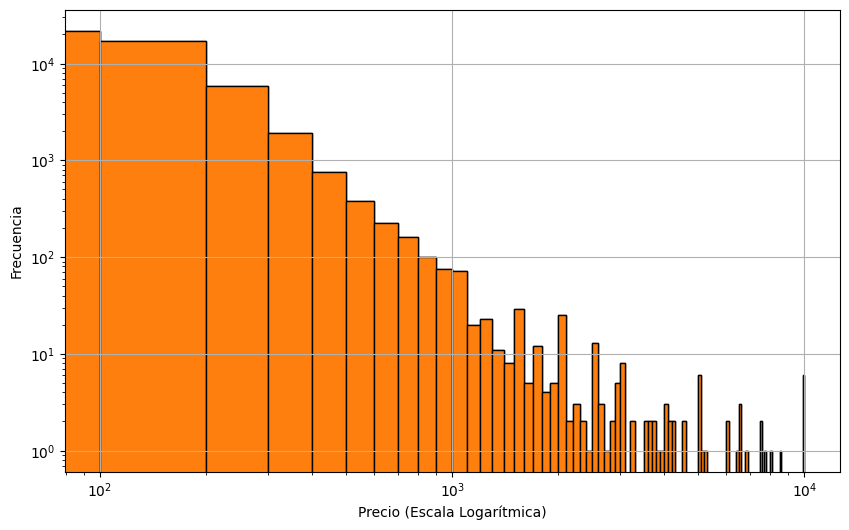

In [168]:
#como hay 674 registros, realizamos grafico
# Histograma de la columna 'price'
# Histograma de la columna 'price' con escala logarítmica en el eje x
plt.figure(figsize=(10, 6))
df_rel['price'].hist(bins=100, edgecolor='black')
df_rel['price'].hist(bins=100, edgecolor='black', log=True)
#plt.title('Distribución de Precios (Escala Logarítmica)')
plt.xlabel('Precio (Escala Logarítmica)')
plt.ylabel('Frecuencia')
plt.xscale('log')
#plt.xscale()
plt.show()

vemos que la mayoria de precios se situan por debajo de los 1000$ aunqu si que hay diversos alojamientos que llegan hasta los 10.000$

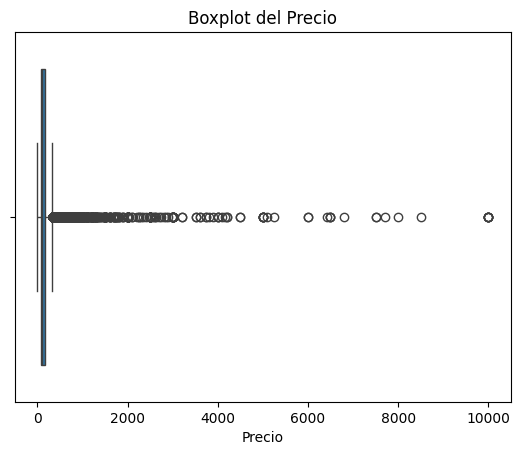

In [169]:
#hacemos un boxplot para analizar los valores mas extremos de la columna price 
sns.boxplot(x=df_rel['price'])
plt.title('Boxplot del Precio')
plt.xlabel('Precio')
plt.show()

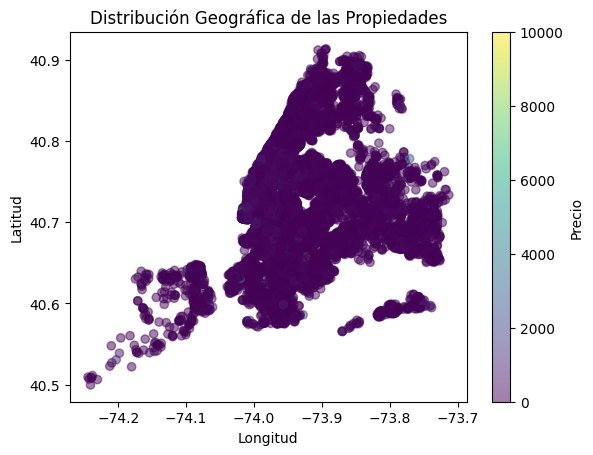

In [170]:
# Mapa de dispersión de la latitud y longitud
plt.scatter(df['longitude'], df['latitude'], c=df['price'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Precio')
plt.title('Distribución Geográfica de las Propiedades')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

En este scatter plot, comprobamos que, no siempre la zona define los precios ya que la distribucion es bastante homogenea

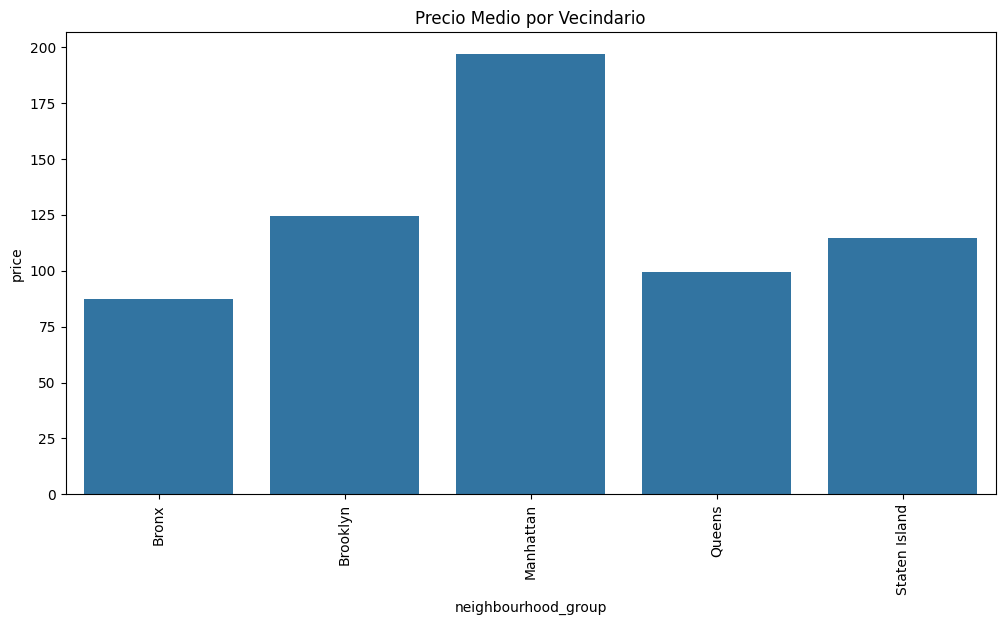

In [171]:

# Calcular el precio medio por vecindario
mean_price_neighbourhood = df.groupby('neighbourhood_group')['price'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=mean_price_neighbourhood, x='neighbourhood_group', y='price')
plt.xticks(rotation=90)
plt.title('Precio Medio por Vecindario')
plt.show()

mostramos un precio medio por becindarios (generalizado)

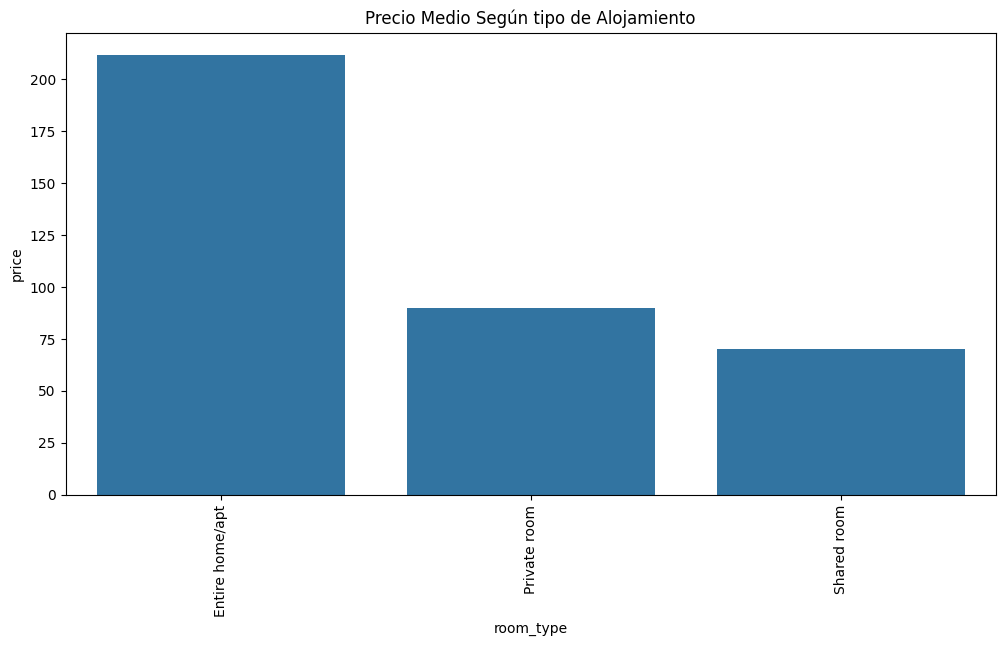

In [46]:

# Calcular el precio medio segun tipo de alojamiento
mean_price_neighbourhood = df.groupby('room_type')['price'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=mean_price_neighbourhood, x='room_type', y='price')
plt.xticks(rotation=90)
plt.title('Precio Medio Según tipo de Alojamiento')
plt.show()

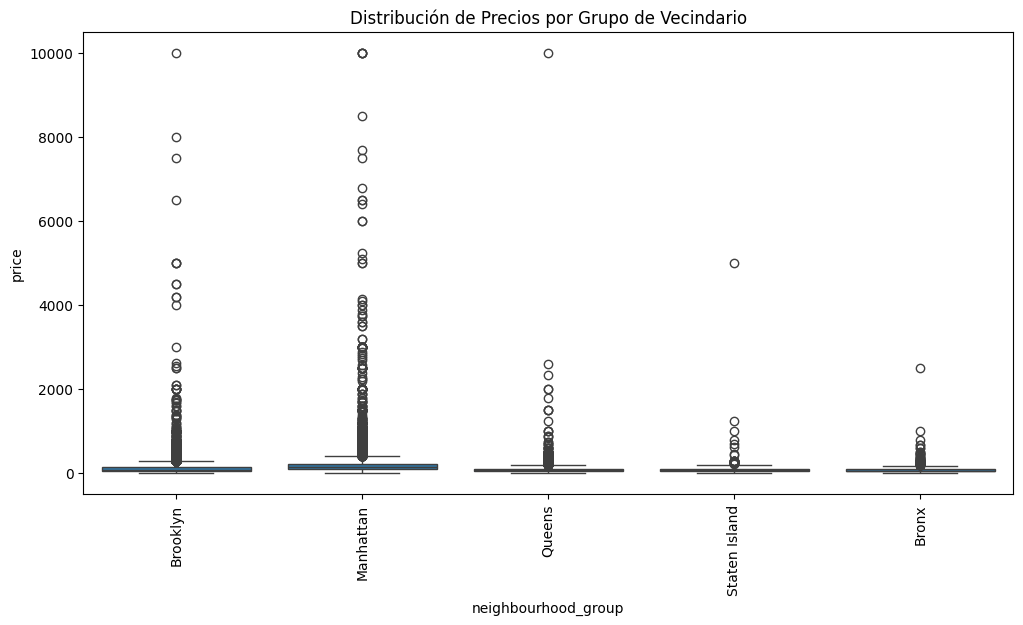

In [47]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_rel, x='neighbourhood_group', y='price')
plt.title('Distribución de Precios por Grupo de Vecindario')
plt.xticks(rotation=90)
plt.show()

Aqui podemos ver que en todos los vecindarios hay valors fuera de la media y si que afectan las localizaciones con el precio.

In [172]:
#mapa de calor geoespacial para mostrar la distribucion de precios en un mapa de la ciudad

import folium
from folium.plugins import HeatMap

# Crear un mapa base centrado en la ciudad
m = folium.Map(location=[40.7128, -74.0060], zoom_start=11)

# Añadir el mapa de calor
heat_data = [[row['latitude'], row['longitude'], row['price']] for index, row in df.iterrows()]
HeatMap(heat_data).add_to(m)

# Guardar o mostrar el mapa
#m.save('heatmap.html')
#mostrar mapa
#m

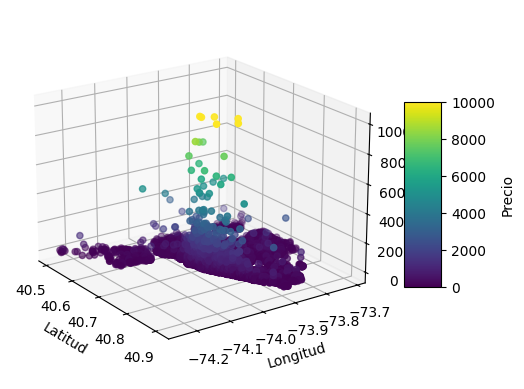

In [173]:



# Crear una figura y un gráfico 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Extraer los datos para los ejes x, y y z
x = df['latitude']
y = df['longitude']
z = df['price']

# Crear un scatter plot 3D
scatter = ax.scatter(x, y, z, c=z, cmap='viridis', label='Precio del alojamiento')

# Añadir etiquetas a los ejes
ax.set_xlabel('Latitud')
ax.set_ylabel('Longitud')
ax.set_zlabel('Precio')

# Añadir una barra de color para mostrar la escala de precios
cbar = fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=5)
cbar.set_label('Precio')

# Ajustar el ángulo de vista para una mejor visualización
ax.view_init(elev=20., azim=-35)

# Mostrar el gráfico
plt.show()

In [49]:
import numpy as np
from ydata_profiling import ProfileReport



In [31]:
#ProfileReport(df_rel)


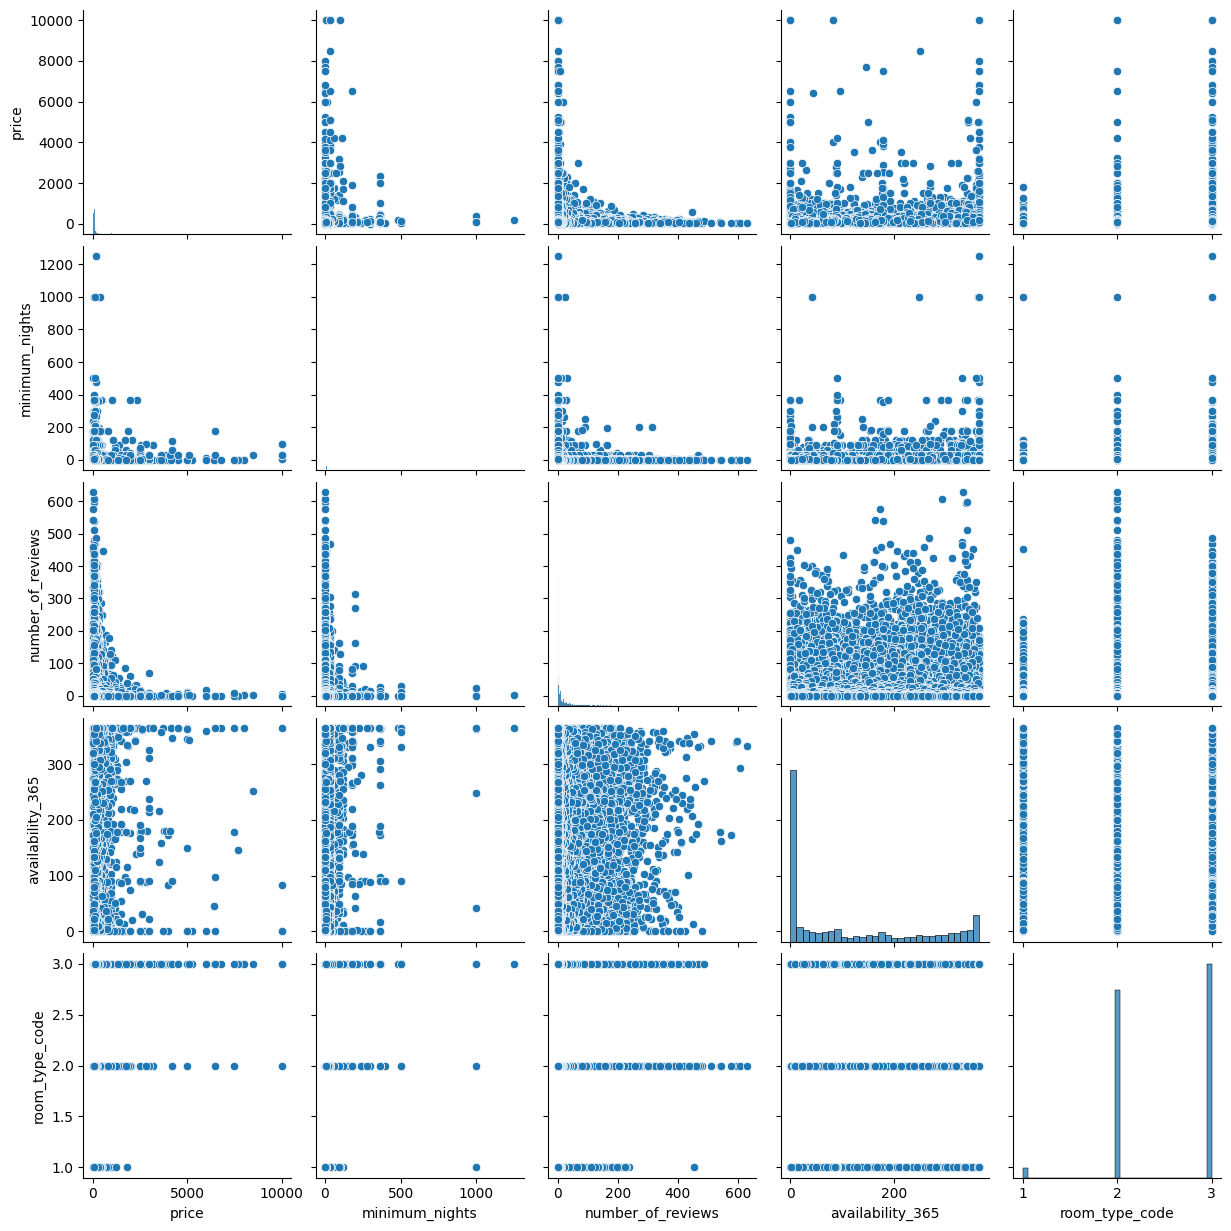

In [50]:
#relacion de todos cn todos
sns.pairplot(data = df_rel)

In [88]:
# Analizamos valores atipicos
df_rel.describe()

,price,minimum_nights,number_of_reviews,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,112.781327
std,240.154170,20.510550,44.550582,131.622289
min,0.000000,1.000000,0.000000,0.000000
25%,69.000000,1.000000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,45.000000
75%,175.000000,5.000000,24.000000,227.000000
max,10000.000000,1250.000000,629.000000,365.000000


Aunque existen menor cantidad de valores atipicos, si que hay valores maximos que difieren de la media.
Estos dependen pricipalmente de la cantidad minima de noches para el alquiler

de cualquier forma revisamos los cuartiles

In [175]:

# Calcular Q1 (primer cuartil) y Q3 (tercer cuartil)
Q1 = df_rel['price'].quantile(0.25)
Q3 = df_rel['price'].quantile(0.75)

# Calcular el IQR
IQR = Q3 - Q1

# Definir los límites severos para identificar valores atípicos
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR

# Identificar los valores atípicos
outliers = df_rel[(df_rel['price'] < lower_bound) | (df_rel['price'] > upper_bound)]

# Enumerar los valores atípicos
print("Valores atípicos en la columna 'price':")
print(outliers['price'])

print('precio mas bajo:', lower_bound)
print('precio mas alto:', upper_bound)

Valores atípicos en la columna 'price':
85       800
103      500
233      500
242      500
299      575
        ... 
48697    750
48740    550
48744    499
48757    700
48839    800
Name: price, Length: 1328, dtype: int64
precio mas bajo: -249.0
precio mas alto: 493.0


Viendo la relacion de estos registros nos damos cuenta que indistintamente de el numero de noches minimas, hay registros que dependiendo de su ubicacion y las caracteristicas del alojamiento pueden ser mas costosos solo por una sola noche que otros tipos de alojamientos. 

In [176]:
#verificamos por ultima vez si existe algun valor nulo antes de empezar el escalado de datos

df_rel.isnull().sum()

neighbourhood_group    0
neighbourhood          0
room_type              0
price                  0
minimum_nights         0
number_of_reviews      0
availability_365       0
room_type_code         0
dtype: int64

In [97]:

df_rel

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,availability_365
0,Brooklyn,Kensington,Private room,149,1,9,365
1,Manhattan,Midtown,Entire home/apt,225,1,45,355
2,Manhattan,Harlem,Private room,150,3,0,365
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,194
4,Manhattan,East Harlem,Entire home/apt,80,10,9,0
...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,Private room,70,2,0,9
48891,Brooklyn,Bushwick,Private room,40,4,0,36
48892,Manhattan,Harlem,Entire home/apt,115,10,0,27
48893,Manhattan,Hell's Kitchen,Shared room,55,1,0,2


In [178]:
# Eliminar columnas no deseadas
columns_to_drop = ['minimum_nights', 'number_of_reviews', 'availability_365']
df_rel.drop(columns=columns_to_drop, inplace=True)

# Codificar columnas categóricas con factorize
df_rel['neighbourhood_group_code'], _ = pd.factorize(df_rel['neighbourhood_group'])
df_rel['neighbourhood_code'], _ = pd.factorize(df_rel['neighbourhood'])
df_rel['room_type_code'], _ = pd.factorize(df_rel['room_type'])

# Eliminar las columnas originales
df_rel.drop(columns=['neighbourhood_group', 'neighbourhood', 'room_type'], inplace=True)

# Mostrar las primeras filas del dataframe transformado
print(df_rel.head())

KeyError: "['minimum_nights', 'number_of_reviews', 'availability_365'] not found in axis"

In [140]:
df_rel

,price,neighbourhood_group_code,neighbourhood_code,room_type_code
0,149,0,0,0
2,150,1,2,0
3,89,0,3,1
4,80,1,4,1
5,200,1,5,1
...,...,...,...,...
48890,70,0,6,0
48891,40,0,21,0
48892,115,1,2,1
48893,55,1,7,2


In [179]:

from sklearn.model_selection import train_test_split
#Separar características y objetivo
X = df_rel[['neighbourhood_group_code',	'neighbourhood_code','room_type_code']]
y = df_rel['price']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrar dimensiones de los conjuntos de datos
print(f'Dimensiones de X_train: {X_train.shape}')
print(f'Dimensiones de X_test: {X_test.shape}')
print(f'Dimensiones de y_train: {y_train.shape}')
print(f'Dimensiones de y_test: {y_test.shape}')

Dimensiones de X_train: (39116, 3)
Dimensiones de X_test: (9779, 3)
Dimensiones de y_train: (39116,)
Dimensiones de y_test: (9779,)
